# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import zipfile
import matplotlib.pyplot as plt

In [2]:
zf=zipfile.ZipFile('data_all.zip')
data=pd.read_csv(zf.open('data_all.csv'))

In [3]:
data[data['e'] == 10].head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
194,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
302,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
737,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
790,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.e.max()
V=data.to_numpy()
y=data.e
X=data.drop(columns=['e']).to_numpy()
# 0 es 0, 10 es A, 35 es Z,36 es a,61 es z

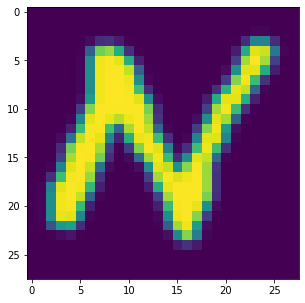

In [5]:
plt.figure(figsize=(5,5))
plt.imshow(V[192, 1:].reshape(28,28))
plt.show()

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [6]:
f1=data["e"]>9
f2=data["e"]<= 35
data["Upper"]=data.e.where(f1 & f2 ,0,inplace=False)
data["Upper"]=data.Upper.astype(int)
data["Lower"]=data.e.where(data.e>35,0,inplace=False)
data["Lower"]=data.Lower.astype(int)
data["Num"]=data.e.where(data.e<9,0,inplace=False)
data["Num"]=data.Num.astype(int)
data.head(49)

,e,1,2,3,4,5,6,7,8,9,...,778,779,780,781,782,783,784,Upper,Lower,Num
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,36,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,3
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33,0,0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30,0,0
5,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,0,0
6,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,40,0
7,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5
8,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,8
9,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2


In [7]:
def uni(x):
    if x>0:
        r=1
    else:
        r=0
    return r
data["Upper"]=data["Upper"].apply(uni)
data["Lower"]=data["Lower"].apply(uni)
data["Num"]=data["Num"].apply(uni)
data.head(10)



,e,1,2,3,4,5,6,7,8,9,...,778,779,780,781,782,783,784,Upper,Lower,Num
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
5,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
6,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
7,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
8,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
9,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1


In [8]:
y1=data.Upper
X1=data.drop(columns=['e',"Upper","Lower","Num"])

In [9]:
#Arbol (Mayusculas)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DTC

X_train, X_test, y_train, y_test=train_test_split(X1, y1, test_size=0.2)

dt=DTC()
dt.fit(X1, y1)
train_score=dt.score(X_train, y_train)
test_score=dt.score(X_test, y_test)
print (train_score, test_score)

1.0 1.0


In [ ]:
%matplotlib inline
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
plot_tree(dt, fontsize=15);


* Try to do the same thing with lowercases.

In [10]:
#Forest (Minusculas)
y2=data.Lower
X2=data.drop(columns=['e',"Upper","Lower","Num"])

X_train, X_test, y_train, y_test=train_test_split(X2, y2, test_size=0.2)

from sklearn.ensemble import RandomForestClassifier as RFC

rf=RFC()
rf.fit(X_train, y_train)
train_score=rf.score(X_train, y_train)
test_score=rf.score(X_test, y_test)
print (train_score, test_score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9899631408706492 0.8684289705566302


* Try to do the same thing with numbers.

In [11]:
# SGDC (Numeros)

y3=data.Num
X3=data.drop(columns=['e',"Upper","Lower","Num"])

X_train_v, X_test_v, y_train_v, y_test_v=train_test_split(X3, y3, test_size=0.2)

from sklearn.linear_model import SGDClassifier as SGDC
sgdc=SGDC()
sgdc.fit(X_train_v, y_train_v)
train_score=sgdc.score(X_train_v, y_train_v)
test_score=sgdc.score(X_test_v, y_test_v)
print (train_score, test_score)

0.6928441707770506 0.6810659789383193


In [12]:
#Naive Bayes (todos los caracteres)(GNB)
from sklearn.naive_bayes import GaussianNB as GNB

y4=data.e
X4=data.drop(columns=['e',"Upper","Lower","Num"])

X_train_v1, X_test_v1, y_train_v1, y_test_v1=train_test_split(X4, y4, test_size=0.2)

gnb=GNB()
gnb.fit(X_train_v1, y_train_v1)
train_score=gnb.score(X_train_v1, y_train_v1)
test_score=gnb.score(X_test_v1, y_test_v1)
print (train_score, test_score)

0.26739525237220196 0.26331399097356545


In [ ]:
# KNNC (Todos los caracteres)
from sklearn.neighbors import KNeighborsClassifier as KNNC

y5=data.e
X5=data.drop(columns=['e',"Upper","Lower","Num"])

X_train_v2, X_test_v2, y_train_v2, y_test_v2=train_test_split(X5, y5, test_size=0.2)

knnc=KNNC(n_neighbors=3)
knnc.fit(X_train_v2, y_train_v2)
train_score=knnc.score(X_train_v2, y_train_v2)
test_score=knnc.score(X_test_v2, y_test_v2)
print (train_score, test_score)